# Комп'ютерний практикум

In [1]:
import hashlib as hl                    # sha1
import secrets as rnd                   # randbelow, choice
import os, sys                          # output and logging
import numpy as np, scipy.stats as sp   # stats calculations
import matplotlib.pyplot as plt         # plotting

In [2]:
# Some hardcoded stuff specifically for sha1
text = ' \t\n\r\v\fabcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
punct = r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""
ALPH = text + punct

PIA_CMP_PREF_C = 40 - 4    # 4 chars to compare in the end
BDA_CMP_PREF_C = 40 - 8    # 8 chars to compare in the end

PIA_CMP_PREF_B = 20 - 2    # 2 bytes to compare in the end
BDA_CMP_PREF_B = 20 - 4    # 4 bytes to compare in the end

N = 125                    # Iteration count

STD_OS = sys.stdout

gamma = 0.95               # Confidence value
# ------------------------------------------

BASE_MESSAGE_PARTS = ["Bondar", "Petro", "Olexandrovych", ""]

In [3]:
def gen_bm_sample(char_counts=[0, 0, 0, 0]):
    result_msg_parts = []

    for i in range(4):
        if char_counts[i] != 0:
            gen_part = str()
            for _ in range(char_counts[i]):
                gen_part += rnd.choice(ALPH[6:])
            result_msg_parts.append(gen_part)
        result_msg_parts.append(BASE_MESSAGE_PARTS[i])

    return "".join(result_msg_parts)

def random_modification(base: str):
    res = list(base)

    for i in range(len(res)):
        if rnd.randbelow(2) == 1:
            res[i] = rnd.choice(ALPH)

    return "".join(res)

def rand_count_vec():
    return ([rnd.randbelow(6),
             rnd.randbelow(6),
             rnd.randbelow(6),
             rnd.randbelow(6)])


In [4]:
def preimage_attack_1(base_message: str, log=False, log_output='preimage_attack_1.txt'):
    print(f"Base message is: {base_message}\n")
    # Formating parameters and output
    pw = len(base_message) + 7

    out = sys.stdout
    if log:
        out = open(log_output, 'w')
    #

    base_sha = hl.sha1(base_message.encode())
    base_sha_suff = base_sha.digest()[PIA_CMP_PREF_B:]
    base_sha_hex = base_sha.hexdigest()
    
    out.write(f"{base_message:{pw}s} : {base_sha_hex[:PIA_CMP_PREF_C]}\t{base_sha_hex[PIA_CMP_PREF_C:]}\n")
    if log: print(f"{base_message:{pw}s} : {base_sha_hex[:PIA_CMP_PREF_C]}\t{base_sha_hex[PIA_CMP_PREF_C:]}")
  
    app = 0
    while True:
        app += 1

        msg = base_message + str(app)
        msg_sha = hl.sha1(msg.encode())
        msg_sha_hex = msg_sha.hexdigest()

        out.write(f"{msg:{pw}s} : {msg_sha_hex[:PIA_CMP_PREF_C]}\t{msg_sha_hex[PIA_CMP_PREF_C:]}")

        if msg_sha.digest()[PIA_CMP_PREF_B:] == base_sha_suff:
            out.write(f"\tSecond preimage on {app}!")
            if log: 
                print(f"{msg:{pw}s} : {msg_sha_hex[:PIA_CMP_PREF_C]}\t{msg_sha_hex[PIA_CMP_PREF_C:]}", end='')
                print(f"\tSecond preimage on {app}!")
            
            break
        else:
            out.write('\n')

    if out != sys.stdout:
        out.close()
    
    return app

In [5]:
def preimage_attack_2(base_message: str, log=False, log_output='preimage_attack_2.txt'):
    print(f"Base message is: {base_message}\n")
    # Formating parameters
    pw = len(base_message) + 10

    out = sys.stdout
    if log:
        out = open(log_output, 'w')
    #

    base_sha = hl.sha1(base_message.encode())
    base_sha_suff = base_sha.digest()[PIA_CMP_PREF_B:]
    base_sha_hex = base_sha.hexdigest()

    out.write(f"{repr(base_message):{pw}s} : {base_sha_hex[:PIA_CMP_PREF_C]}\t{base_sha_hex[PIA_CMP_PREF_C:]}\n")
    if log: print(f"{repr(base_message):{pw}s} : {base_sha_hex[:PIA_CMP_PREF_C]}\t{base_sha_hex[PIA_CMP_PREF_C:]}")

    itr = 0
    while True:
        itr += 1
        msg = random_modification(base_message)
        msg_sha = hl.sha1(msg.encode())
        msg_sha_hex = msg_sha.hexdigest()

        out.write(f"{repr(msg):{pw}s} : {msg_sha_hex[:PIA_CMP_PREF_C]}\t{msg_sha_hex[PIA_CMP_PREF_C:]}")

        if msg_sha.digest()[PIA_CMP_PREF_B:] == base_sha_suff and msg != base_message:
            out.write(f"\tSecond preimage in {itr} iterations!\n")
            if log: 
                print(f"{repr(msg):{pw}s} : {msg_sha_hex[:PIA_CMP_PREF_C]}\t{msg_sha_hex[PIA_CMP_PREF_C:]}", end='')
                print(f"\tSecond preimage in {itr} iterations!")

            break
        else:
            out.write('\n')

    if out != sys.stdout:
        out.close()
    
    return itr
        

### Атака пошуку другого прообразу 1

In [6]:
def birthday_attack_1(base_message: str, log=False, log_output='birthday_attack_1.txt'):
    print(f"Base message is: {base_message}\n")
    # Formating parameters
    pw = len(base_message) + 6

    out = sys.stdout
    if log:
        out = open(log_output, 'w')
    #

    base_sha = hl.sha1(base_message.encode())
    base_sha_hex = base_sha.hexdigest()

    out.write(f"{base_message:{pw}s} : {base_sha_hex[:BDA_CMP_PREF_C]}\t{base_sha_hex[BDA_CMP_PREF_C:]}\n")
    if log: print(f"{base_message:{pw}s} : {base_sha_hex[:BDA_CMP_PREF_C]}\t{base_sha_hex[BDA_CMP_PREF_C:]}")

    prev_dict = {base_sha.digest()[BDA_CMP_PREF_B:]: base_message}
    app = 0
    while True:
        app += 1

        msg = base_message + str(app)
        
        msg_sha = hl.sha1(msg.encode())
        msg_sha_hex = msg_sha.hexdigest()
        msg_sha_suff = msg_sha.digest()[BDA_CMP_PREF_B:]

        if msg_sha_suff in prev_dict.keys():
            col = prev_dict[msg_sha_suff]
            col_sha = hl.sha1(col.encode())
            
            out.write(f"\nCollision found in {app} iterations!\n")
            out.write(f"Msg: {msg:{pw}s} : {msg_sha_hex[:BDA_CMP_PREF_C]}\t{msg_sha_hex[BDA_CMP_PREF_C:]}\n")
            out.write(f"Col: {col:{pw}s} : {col_sha.hexdigest()[:BDA_CMP_PREF_C]}\t{col_sha.hexdigest()[BDA_CMP_PREF_C:]}\n")
            if log: 
                print(f"\nCollision found in {app} iterations!")
                print(f"Msg: {msg:{pw}s} : {msg_sha_hex[:BDA_CMP_PREF_C]}\t{msg_sha_hex[BDA_CMP_PREF_C:]}")
                print(f"Col: {col:{pw}s} : {col_sha.hexdigest()[:BDA_CMP_PREF_C]}\t{col_sha.hexdigest()[BDA_CMP_PREF_C:]}")

            break
        else:
            out.write(f"{msg:{pw}s} : {msg_sha_hex[:BDA_CMP_PREF_C]}\t{msg_sha_hex[BDA_CMP_PREF_C:]}\n")
            prev_dict[msg_sha_suff] = msg
    
    if out != sys.stdout:
        out.close()
    
    return app

In [7]:
def birthday_attack_2(base_message: str, log=False, log_output='birthday_attack_2.txt'):
    print(f"Base message is: {base_message}\n")
    # Formating parameters
    pw = len(base_message) + 8

    out = sys.stdout
    if log:
        out = open(log_output, 'w')
    #

    base_sha = hl.sha1(base_message.encode())
    base_sha_hex = base_sha.hexdigest()

    out.write(f"{repr(base_message):{pw}s} : {base_sha_hex[:BDA_CMP_PREF_C]}\t{base_sha_hex[BDA_CMP_PREF_C:]}\n")
    if log: print(f"{repr(base_message):{pw}s} : {base_sha_hex[:BDA_CMP_PREF_C]}\t{base_sha_hex[BDA_CMP_PREF_C:]}")

    prev_dict = {base_sha.digest()[BDA_CMP_PREF_B:]: base_message}
    itr = 0
    while True:
        itr += 1

        msg = random_modification(base_message)

        msg_sha = hl.sha1(msg.encode())
        msg_sha_hex = msg_sha.hexdigest()
        msg_sha_suff = msg_sha.digest()[BDA_CMP_PREF_B:]

        if msg_sha_suff in prev_dict.keys() and msg != base_message:
            col = prev_dict[msg_sha.digest()[BDA_CMP_PREF_B:]]
            col_sha = hl.sha1(col.encode())

            out.write(f"\nCollision found in {itr} iterations!\n")
            out.write(f"Msg: {repr(msg):{pw}s} : {msg_sha_hex[:BDA_CMP_PREF_C]}\t{msg_sha_hex[BDA_CMP_PREF_C:]}\n")
            out.write(f"Col: {repr(col):{pw}s} : {col_sha.hexdigest()[:BDA_CMP_PREF_C]}\t{col_sha.hexdigest()[BDA_CMP_PREF_C:]}\n")
            if log: 
                print(f"\nCollision found in {itr} iterations!")
                print(f"Msg: {repr(msg):{pw}s} : {msg_sha_hex[:BDA_CMP_PREF_C]}\t{msg_sha_hex[BDA_CMP_PREF_C:]}")
                print(f"Col: {repr(col):{pw}s} : {col_sha.hexdigest()[:BDA_CMP_PREF_C]}\t{col_sha.hexdigest()[BDA_CMP_PREF_C:]}")
                
            break
        else:
            out.write(f"{repr(msg):{pw}s} : {msg_sha_hex[:BDA_CMP_PREF_C]}\t{msg_sha_hex[BDA_CMP_PREF_C:]}\n")
            prev_dict[msg_sha_suff] = msg

    if out != sys.stdout:
        out.close()
    
    return itr

## Запуск атак

### Атака пошуку другого прообразу 1

In [8]:
general_stats = {}

#### Перша атака

In [9]:
preimage_attack_1(gen_bm_sample([5, 0, 0, 0]), True)

Base message is: M=XF3BondarPetroOlexandrovych

M=XF3BondarPetroOlexandrovych        : c5881474f6ebb4e32dd497df9d240bfb9e24	659e


M=XF3BondarPetroOlexandrovych344174  : 5b69c82dad8bc0f3cac5b76c25312d1fda53	659e	Second preimage on 344174!


344174

In [10]:
stats = []

with open(os.devnull, 'w') as f:
    sys.stdout = f
    for i in range(N):
        msg = gen_bm_sample(rand_count_vec())
        stats.append((msg, preimage_attack_1(msg, True, os.devnull)))
    sys.stdout = STD_OS

with open('preimage_attack_1_stats.txt', 'w') as f:
    f.write('-' + ('-'*52) + '-' + ('-'*12) + '-\n')
    f.write(f"| {'Start message':50s} | {'Iterations':10s} |\n")
    f.write('|' + ('-'*52) + '+' + ('-'*12) + '|\n')
    for msg, st in stats:
        f.write(f"| {repr(msg):50s} | {st:10} |\n")
    f.write('-' + ('-'*52) + '-' + ('-'*12) + '-\n')

data = [count for _, count in stats]
sum_itr = np.sum(data)
mean_val = np.mean(data)
variance = np.var(data)

# Computing confidence interval
q = 1 - ((1 - gamma) / 2)   # quantile
s = np.sqrt(variance)
scale_t = sp.t.ppf(q, N - 1)    # N - 1 deqrees of freedom
confidence_interval = (mean_val - (scale_t * s / np.sqrt(N)), mean_val + (scale_t * s / np.sqrt(N)))

print(f"Sum of iterations: {sum_itr}")
print(f"Mean: {mean_val}")
print(f"Variance: {variance} -> Standart deviance: {s}")
print(f"Confidence interval: {confidence_interval}")

general_stats["1.1"] = [sum_itr, mean_val, variance, s, confidence_interval, stats.copy()]

Sum of iterations: 8603057
Mean: 68824.456
Variance: 5236247713.384064 -> Standart deviance: 72361.92170875552
Confidence interval: (56014.06613020912, 81634.8458697909)


### Атака пошуку другого прообразу 2

In [11]:
preimage_attack_2(gen_bm_sample([0, 5, 0, 0]), True)

Base message is: Bondar)y$C}PetroOlexandrovych

'Bondar)y$C}PetroOlexandrovych'         : 2f4d4f7dc976fa3a036cc6de92450b359e1a	b599
'1Z&dYr)=>!  Et>X(lex\\ndCrvyca'        : db1b0d4d66978ac701b70c575ac735acfd25	b599	Second preimage in 3818 iterations!


3818

In [12]:
stats = []

with open(os.devnull, 'w') as f:
    sys.stdout = f
    for i in range(N):
        msg = gen_bm_sample(rand_count_vec())
        stats.append((msg, preimage_attack_2(msg, True, os.devnull)))
    sys.stdout = STD_OS

with open('preimage_attack_2_stats.txt', 'w') as f:
    f.write('-' + ('-'*52) + '-' + ('-'*12) + '-\n')
    f.write(f"| {'Start message':50s} | {'Iterations':10s} |\n")
    f.write('|' + ('-'*52) + '+' + ('-'*12) + '|\n')
    for msg, st in stats:
        f.write(f"| {repr(msg):50s} | {st:10} |\n")
    f.write('-' + ('-'*52) + '-' + ('-'*12) + '-\n')

data = [count for _, count in stats]
sum_itr = np.sum(data)
mean_val = np.mean(data)
variance = np.var(data)

# Computing confidence interval
q = 1 - ((1 - gamma) / 2)   # quantile
s = np.sqrt(variance)
scale_t = sp.t.ppf(q, N - 1)    # N - 1 deqrees of freedom
confidence_interval = (mean_val - (scale_t * s / np.sqrt(N)), mean_val + (scale_t * s / np.sqrt(N)))

print(f"Sum of iterations: {sum_itr}")
print(f"Mean: {mean_val}")
print(f"Variance: {variance} -> Standart deviance: {s}")
print(f"Confidence interval: {confidence_interval}")

general_stats["1.2"] = [sum_itr, mean_val, variance, s, confidence_interval, stats.copy()]

Sum of iterations: 8028115
Mean: 64224.92
Variance: 4642444152.5216 -> Standart deviance: 68135.48379898391
Confidence interval: (52162.74571246731, 76287.09428753269)


### Атака днів народжень 1

In [13]:
birthday_attack_1(gen_bm_sample([0, 0, 5, 0]), True)

Base message is: BondarPetrop_``&Olexandrovych

BondarPetrop_``&Olexandrovych       : 8f7638594fe592680c98ec68af11e663	7867dde5

Collision found in 32493 iterations!
Msg: BondarPetrop_``&Olexandrovych32493  : 4cdb3a459b3d77745beed40c6bbfc8aa	701a7749
Col: BondarPetrop_``&Olexandrovych8971   : 57f8e99489599eb4f45281ff13b0d7d3	701a7749


32493

In [14]:
stats = []

with open(os.devnull, 'w') as f:
    sys.stdout = f
    for i in range(N):
        msg = gen_bm_sample(rand_count_vec())
        stats.append((msg, birthday_attack_1(msg, True, os.devnull)))
    sys.stdout = STD_OS

with open('birthday_attack_1_stats.txt', 'w') as f:
    f.write('-' + ('-'*52) + '-' + ('-'*12) + '-\n')
    f.write(f"| {'Start message':50s} | {'Iterations':10s} |\n")
    f.write('|' + ('-'*52) + '+' + ('-'*12) + '|\n')
    for msg, st in stats:
        f.write(f"| {repr(msg):50s} | {st:10} |\n")
    f.write('-' + ('-'*52) + '-' + ('-'*12) + '-\n')

data = [count for _, count in stats]
sum_itr = np.sum(data)
mean_val = np.mean(data)
variance = np.var(data)

# Computing confidence interval
q = 1 - ((1 - gamma) / 2)   # quantile
s = np.sqrt(variance)
scale_t = sp.t.ppf(q, N - 1)    # N - 1 deqrees of freedom
confidence_interval = (mean_val - (scale_t * s / np.sqrt(N)), mean_val + (scale_t * s / np.sqrt(N)))

print(f"Sum of iterations: {sum_itr}")
print(f"Mean: {mean_val}")
print(f"Variance: {variance} -> Standart deviance: {s}")
print(f"Confidence interval: {confidence_interval}")

general_stats["2.1"] = [sum_itr, mean_val, variance, s, confidence_interval, stats.copy()]

Sum of iterations: 9870467
Mean: 78963.736
Variance: 1583003302.5783038 -> Standart deviance: 39786.97403143778
Confidence interval: (71920.160635413, 86007.311364587)


### Атака днів народжень 2

In [15]:
birthday_attack_2(gen_bm_sample([0, 0, 0, 5]), True)

Base message is: BondarPetroOlexandrovych>l)_<

'BondarPetroOlexandrovych>l)_<'       : 18dd999f465e13449458c09695f0a07c	26529b3e

Collision found in 22872 iterations!
Msg: 'Bo\\fpr;Otfz4lexZqYwovylO>I)Oa'      : 816b99e0d4f6cb8e0e34561413b7418c	7677975b
Col: 'B&nda}Pe9LoO(ex(p0roR<cUw@+_/'       : 6339fdde28047b14e8baf3cb4057896a	7677975b


22872

In [16]:
stats = []

with open(os.devnull, 'w') as f:
    sys.stdout = f
    for i in range(N):
        msg = gen_bm_sample(rand_count_vec())
        stats.append((msg, birthday_attack_2(msg, True, os.devnull)))
    sys.stdout = STD_OS

with open('birthday_attack_2_stats.txt', 'w') as f:
    f.write('-' + ('-'*52) + '-' + ('-'*12) + '-\n')
    f.write(f"| {'Start message':50s} | {'Iterations':10s} |\n")
    f.write('|' + ('-'*52) + '+' + ('-'*12) + '|\n')
    for msg, st in stats:
        f.write(f"| {repr(msg):50s} | {st:10} |\n")
    f.write('-' + ('-'*52) + '-' + ('-'*12) + '-\n')

data = [count for _, count in stats]
sum_itr = np.sum(data)
mean_val = np.mean(data)
variance = np.var(data)

# Computing confidence interval
q = 1 - ((1 - gamma) / 2)   # quantile
s = np.sqrt(variance)
scale_t = sp.t.ppf(q, N - 1)    # N - 1 deqrees of freedom
confidence_interval = (mean_val - (scale_t * s / np.sqrt(N)), mean_val + (scale_t * s / np.sqrt(N)))

print(f"Sum of iterations: {sum_itr}")
print(f"Mean: {mean_val}")
print(f"Variance: {variance} -> Standart deviance: {s}")
print(f"Confidence interval: {confidence_interval}")

general_stats["2.2"] = [sum_itr, mean_val, variance, s, confidence_interval, stats.copy()]

Sum of iterations: 10873352
Mean: 86986.816
Variance: 1874496557.654144 -> Standart deviance: 43295.456547473244
Confidence interval: (79322.12627276996, 94651.50572723005)


### Візуалізація результатів

In [25]:
def plot_hist(data_array, atk):
    plt.figure(figsize=(15, 6))
    n, bins, _ = plt.hist(data_array, bins=20)
    print(n)

    plt.title(f"Iterations distribution for {atk}")
    plt.grid(True)
    plt.yticks(range(int(np.max(n)) + 1))
    plt.xlim([np.min(data_array) - 1000, np.max(data_array) + 1000])
    plt.xticks(bins)
    plt.show()

Number of iterations: 125

Attack 1.1:
General number of iterations: 8603057
Mean value: 68824.456
Variance: 5236247713.384064
Standart deviance: 72361.92170875552
Confidence interval: (56014.06613020912, 81634.8458697909)

[41. 17. 19. 13. 10. 10.  4.  1.  2.  3.  3.  0.  0.  0.  1.  0.  0.  0.
  0.  1.]


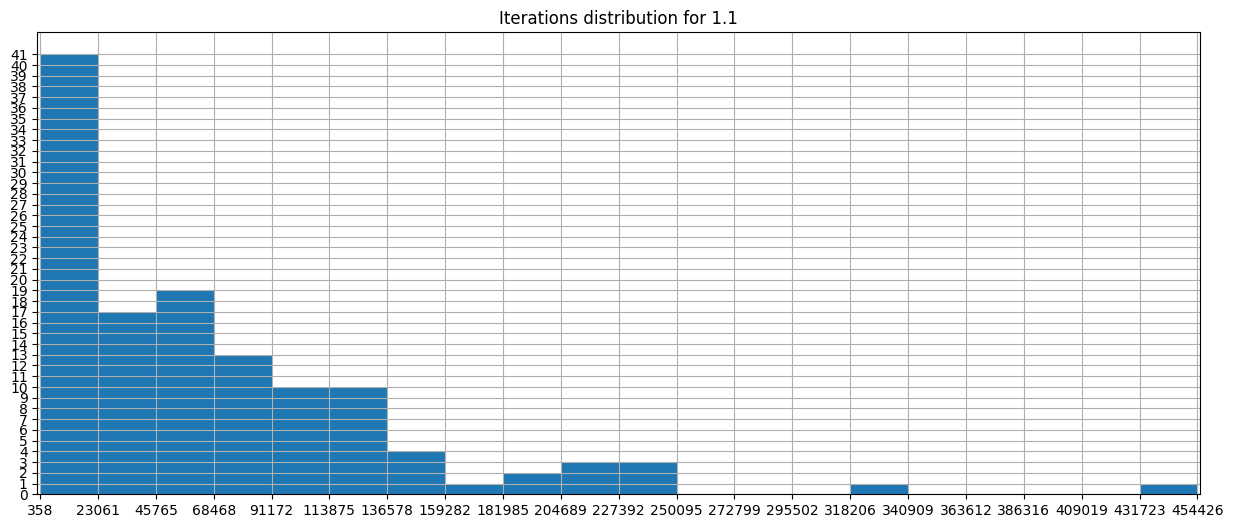

Attack 1.2:
General number of iterations: 8028115
Mean value: 64224.92
Variance: 4642444152.5216
Standart deviance: 68135.48379898391
Confidence interval: (52162.74571246731, 76287.09428753269)

[32. 24. 22. 12. 11.  5.  4.  3.  4.  1.  1.  1.  2.  0.  1.  0.  1.  0.
  0.  1.]


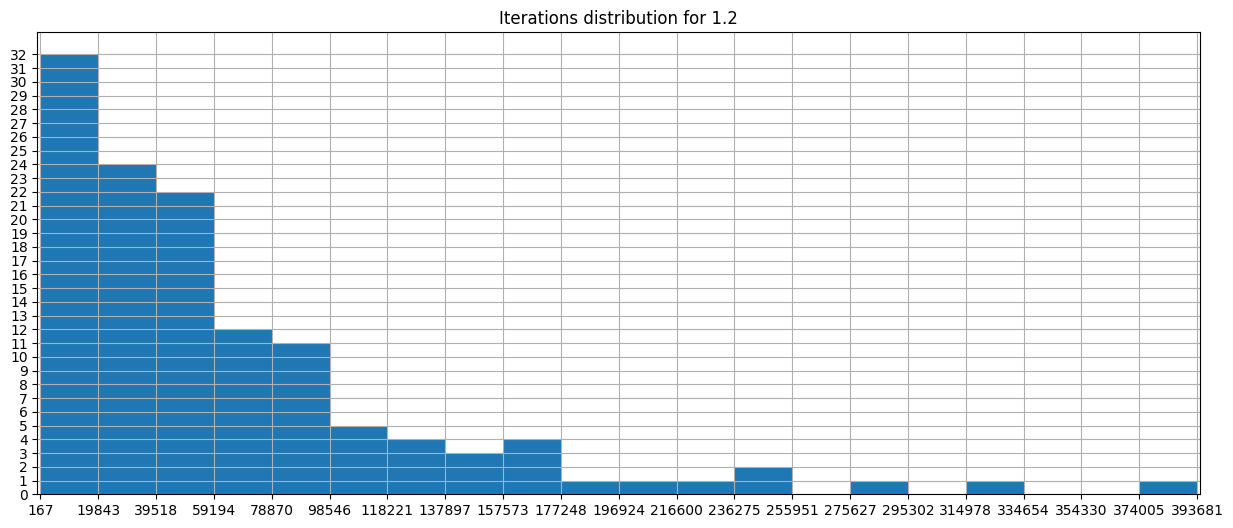

Attack 2.1:
General number of iterations: 9870467
Mean value: 78963.736
Variance: 1583003302.5783038
Standart deviance: 39786.97403143778
Confidence interval: (71920.160635413, 86007.311364587)

[ 2.  5. 12. 12. 12.  6.  8. 10. 14. 11.  8.  8.  6.  3.  3.  2.  1.  1.
  0.  1.]


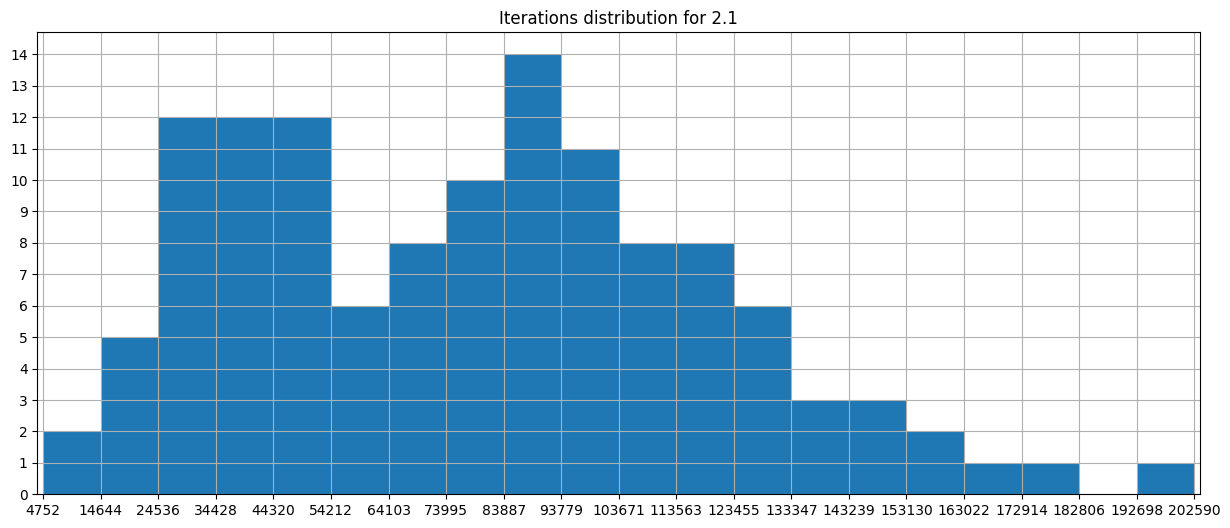

Attack 2.2:
General number of iterations: 10873352
Mean value: 86986.816
Variance: 1874496557.654144
Standart deviance: 43295.456547473244
Confidence interval: (79322.12627276996, 94651.50572723005)

[ 4.  8.  9. 13.  8. 13. 10.  7. 11.  6.  5.  6.  7.  4.  5.  5.  2.  0.
  0.  2.]


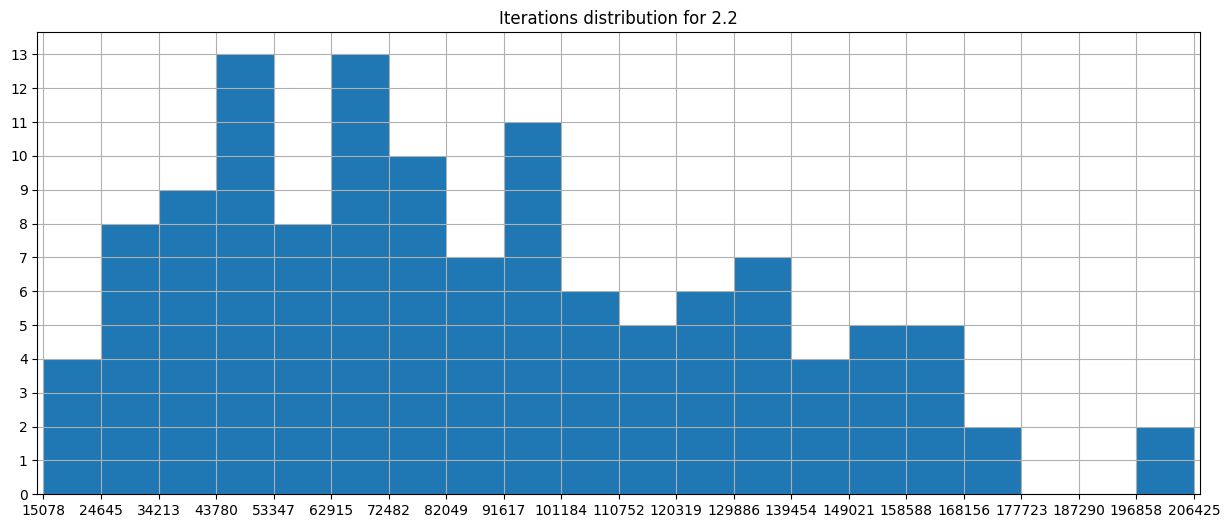

In [26]:
print(f"Number of iterations: {N}", end='\n\n')
for key in general_stats:
    print('Attack ' + key, end=':\n')
    print(f'General number of iterations: {general_stats[key][0]}')
    print(f'Mean value: {general_stats[key][1]}')
    print(f'Variance: {general_stats[key][2]}')
    print(f'Standart deviance: {general_stats[key][3]}')
    print(f'Confidence interval: {general_stats[key][4]}')
    print()

    plot_hist([count for _, count in general_stats[key][5]], key)
    